## Cau 1

In [1]:
def matrix(n):
    A = [[0] * n for x in range(n)]
    for i in range(n):
        for j in range(n):
            if i % 2 == 0:
                if j % 2 == 0:
                    A[i][j] = 0
                else:
                    A[i][j] = 1
            else:
                if j % 2 == 0:
                    A[i][j] = 1
                else:
                    A[i][j] = 0
    return A

In [2]:
matrix(1)

[[0]]

In [3]:
matrix(2)

[[0, 1], [1, 0]]

In [4]:
matrix(3)

[[0, 1, 0], [1, 0, 1], [0, 1, 0]]

In [5]:
matrix(5)

[[0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0]]

In [6]:
matrix(6)

[[0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0]]

## Cau 2

In [15]:
def Star(n):
    for i in range(n):
        for j in range(i+1):
            print('*',end='')
        print('\n')

In [17]:
Star(5)

*

**

***

****

*****



In [18]:
Star(6)

*

**

***

****

*****

******



## Cau 3

In [35]:
import pandas as pd
import numpy as np
df=pd.read_csv('admission.csv')
A=df.values.tolist()
A=np.array(A)

Gre=A[:,0]
TOEFL=A[:,1]
CGPA=A[:,2]
chance_admit=A[:,3]

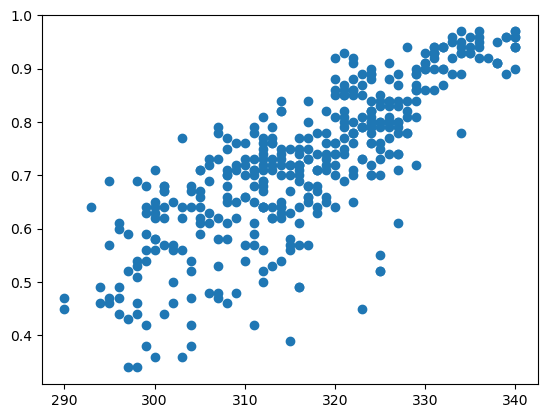

In [37]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = Gre
ypoints = chance_admit

plt.plot(xpoints, ypoints,'o')
plt.show()

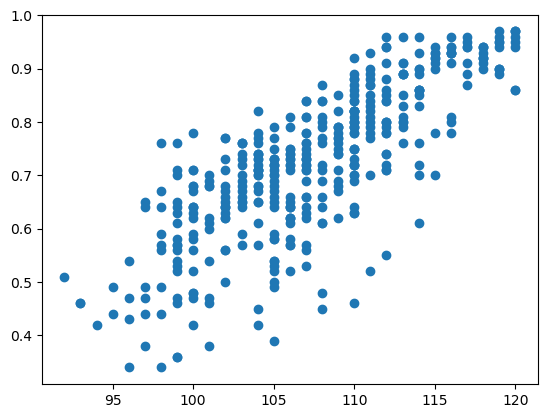

In [39]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = TOEFL
ypoints = chance_admit

plt.plot(xpoints, ypoints,'o')
plt.show()

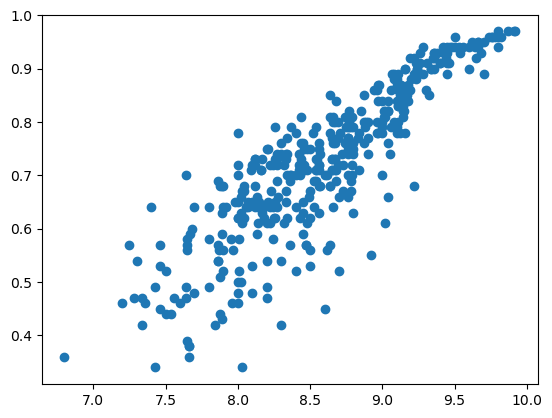

In [40]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = CGPA
ypoints = chance_admit

plt.plot(xpoints, ypoints,'o')
plt.show()

Theo hình vẽ, đại lượng Chance Admit phụ thuộc theo đại lượng CGPA nhiều nhất.

In [42]:
def getAb(xs, ys):
    col1 = np.ones(len(xs))
    colx = np.array(xs)
    A = np.array([col1, colx]).T
    b = np.array(ys).reshape(len(ys), 1)
    return A, b

In [85]:
def vector_norm(v):
    return sum(vi ** 2 for vi in v) ** 0.5

In [88]:
x,y=getAb(CGPA,chance_admit)
x_hat = np.linalg.inv(np.matmul(np.transpose(x),x)) @ np.matmul(np.transpose(x),y)
print(x_hat)
print(f'y={x_hat[0]}+{x_hat[1]}x')
print('Chuan cua vecto phan du:')
norm=vector_norm(x@x_hat-y)
print(norm)

[[-1.07151166]
 [ 0.20884723]]
y=[-1.07151166]+[0.20884723]x
Chuan cua vecto phan du:
[1.38785399]


## Cau 4

In [77]:
import numpy as np
def matrix_power(a, power):
    if power == 0:
        B = [[0] * len(A[0]) for x in range(len(A))]
        for i in range(len(A)):
            for j in range(len(A[0])):
                if i == j:
                    B[i][j]=1
        return np.array(B)
    
    if power == 1:
        return np.array(a)
    
    rows = len(a)
    columns = len(a[0])
    result = np.zeros((rows, columns))
    b = a
    for step in range(1, power):
        result = np.zeros((rows, columns))
        for i in range(0, rows):
            for j in range(0, columns):
                for m in range(0, rows):
                    result[i][j] += a[i][m] * b[m][j]      
        a = result
    return result

In [80]:
A=[[1,2,4],[5,2,2],[1,2,2]]
matrix_power(A,5)

array([[4605., 4234., 5576.],
       [6247., 5758., 7608.],
       [3563., 3270., 4312.]])

## Cau 5

In [94]:
import numpy as np
def Markov(n):
    P = np.random.rand (n, n)
    P = P / P.sum (axis=1, keepdims=True)
    print ("Ma tran xac suat chuyen:")
    print(P)
    pi = np.random.rand(n)
    pi = pi / pi.sum()
    print ("Vector phan phoi xac suat dau:")
    print (pi)

In [95]:
Markov(5)

Ma tran xac suat chuyen:
[[0.00121141 0.2409044  0.20579993 0.33554098 0.21654328]
 [0.13809193 0.19787833 0.1651786  0.40108448 0.09776665]
 [0.28591619 0.04404417 0.1384522  0.48454934 0.04703809]
 [0.10439289 0.25110343 0.19467205 0.23409039 0.21574124]
 [0.24625533 0.33422239 0.08130279 0.05321948 0.28500001]]
Vector phan phoi xac suat dau:
[0.13705017 0.25230995 0.17931405 0.20472872 0.22659711]


In [101]:
k1 = 3
k2 = 10
pi_k1 = np.dot (pi, np.linalg.matrix_power (P, k1))
pi_k2 = np.dot (pi, np.linalg.matrix_power (P, k2))
print ("Vector phân phối tại thời điểm", k1, ":")
print (pi_k1)
print ("Vector phân phối tại thời điểm", k2, ":")
print (pi_k2)



Vector phân phối tại thời điểm 3 :
[0.30886934 0.09934258 0.19384786 0.22477899 0.17316123]
Vector phân phối tại thời điểm 10 :
[0.30706534 0.09925901 0.19104518 0.22790437 0.1747261 ]
